# Assessing Market Opportunities for Alpaca Wool Scarves - Interpreting Forecasting Results

In this activity, you’ll interpret the time series forecasting results of the Google Trends data about the market demand of alpaca wool scarves in Canada and Uruguay. The purpose will be to validate market opportunities to help the Aymara indigenous people in Bolivia export alpaca wool scarves to different countries or regions.

You’ll continue collaborating with the International Co-operative Alliance. But now, you’ll use Prophet to validate prospective market opportunities.

## Instructions

1. Open Google Colab and import the provided notebook.

2. Execute the code cells in "Step 2" to set-up the notebook, prepare the data, and use Prophet for time series forecasting.

3. Plot Prophet’s predictions by using the `plot` function. Pass the forecasts for Canada and Uruguay, respectively, as the parameters.

4. Analyze the forecast results by using Panda's `plot` function to plot the forecast DataFrame's “yhat”, “yhat_lower”, and “yhat_upper” columns for the Canadian and Uruguay models. Set the “ds” column as the DataFrame index before creating these plots.

5. Use the `plot_component` function from the Prophet models to analyze the patterns of the Google Trends times series data for the Canada and Uruguay models. Be sure to reset the index by converting “ds” back to a column before creating these plots.


## Step 2: Notebook Set Up, Data Preparation and Time Series Forecasting

### Notebook Set Up

In [1]:
# Install the required libraries
!pip install hvplot
!pip install holoviews

Libraries successfully installed


In [11]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
import datetime as dt
import holoviews as hv
from fbprophet import Prophet
from Prophet import Prophet



%matplotlib inline

ModuleNotFoundError: No module named 'Prophet'

### Data Loading

In [3]:
# Upload the scarf-google-trends-data.csv file
from google.colab import files
uploaded = files.upload()

Saving scarf-google-trends-data.csv to scarf-google-trends-data.csv


In [2]:
# Read the data from the scarf-google-trends-data.csv file into a Pandas DataFrame
df_alpaca = pd.read_csv("/Users/annatoaze/Documents/FinTech_Bootcamp/Activities - Repeat/6-04-Stu_Interpreting_Forecasting_Results/Resources/scarf-google-trends-data.csv")

# Review the DataFrame
df_alpaca.head()

,week,canada,uruguay
0,11/8/15,74,17
1,11/15/15,81,17
2,11/22/15,94,17
3,11/29/15,92,0
4,12/6/15,87,18


### Plotting the general trends

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
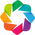

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [3]:
# Set `bokeh` to render hvPlot charts
hv.extension("bokeh")

# Plot the general tredns using hvPlot
df_alpaca.hvplot() 

### Data Preparation


In [4]:
# Create a DataFrame for Canada to include the week and canada columns
df_canada = df_alpaca[["week", "canada"]]

# Rename the columns to the Prophet model syntax 
df_canada = df_canada.rename(columns={"week":"ds", "canada":"y"})

# Review the Canada DataFrame
df_canada.head()

,ds,y
0,11/8/15,74
1,11/15/15,81
2,11/22/15,94
3,11/29/15,92
4,12/6/15,87


In [5]:
# Create a DataFrame for Uruguay to include the week and uruguay columns
df_uruguay = df_alpaca[["week", "uruguay"]]

# Rename the columns to the Prophet model syntax 
df_uruguay = df_uruguay.rename(columns={"week":"ds", "uruguay":"y"})

# Review the Uruguay DataFrame
df_uruguay.head()

,ds,y
0,11/8/15,17
1,11/15/15,17
2,11/22/15,17
3,11/29/15,0
4,12/6/15,18


### Create two Prophet models, one for each country

In [6]:
# Create a Prophet model for Canada
model_canada = Prophet()

NameError: name 'Prophet' is not defined

In [7]:
# Create a Prophet model for Uruguay
model_uruguay = Prophet()

NameError: name 'Prophet' is not defined

### Fit the Prophet models

In [10]:
# Fit the Canada Prophet model
model_canada.fit(df_canada)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
# Fit the Uruguay Prophet model
model_uruguay.fit(df_uruguay)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Use the `make_future_dataframe` function to forecast one year of trend dates

In [12]:
# Forecast one year of weekly future trends data for Canada 
future_canada = model_canada.make_future_dataframe(periods=52, freq="W")

# Display the last five rows of the future_canada DataFrame
future_canada.tail()

,ds
307,2021-09-26
308,2021-10-03
309,2021-10-10
310,2021-10-17
311,2021-10-24


In [13]:
# Forecast one year of weekly future trends data for Uruguay 
future_uruguay = model_uruguay.make_future_dataframe(periods=52, freq="W")

# Display the last five rows of the future_uruguay DataFrame
future_uruguay.tail()

,ds
307,2021-09-26
308,2021-10-03
309,2021-10-10
310,2021-10-17
311,2021-10-24


### Predict the future trends data by using the `predict` method for both the Canada and Uruguay models. 

In [14]:
# Make predictions for Canada using the future_canada DataFrame
forecast_canada = model_canada.predict(future_canada)

# Display the first five rows of the forecast_canada DataFrame
forecast_canada.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-08,46.046115,68.282558,81.395917,46.046115,46.046115,28.544840,28.544840,28.544840,28.544840,28.544840,28.544840,0.0,0.0,0.0,74.590955
1,2015-11-15,45.949933,72.828071,85.314991,45.949933,45.949933,32.937274,32.937274,32.937274,32.937274,32.937274,32.937274,0.0,0.0,0.0,78.887207
2,2015-11-22,45.853751,75.639770,88.299846,45.853751,45.853751,36.023778,36.023778,36.023778,36.023778,36.023778,36.023778,0.0,0.0,0.0,81.877529
3,2015-11-29,45.757569,78.181450,90.777670,45.757569,45.757569,38.865473,38.865473,38.865473,38.865473,38.865473,38.865473,0.0,0.0,0.0,84.623042
4,2015-12-06,45.661387,81.193318,94.210271,45.661387,45.661387,41.701658,41.701658,41.701658,41.701658,41.701658,41.701658,0.0,0.0,0.0,87.363045


In [15]:
# Make predictions for Uruguay using the future_uruguay DataFrame
forecast_uruguay = model_uruguay.predict(future_uruguay)

# Display the first five rows of the forecast_uruguay DataFrame
forecast_uruguay.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-08,33.346622,9.111266,42.872098,33.346622,33.346622,-7.082872,-7.082872,-7.082872,-7.082872,-7.082872,-7.082872,0.0,0.0,0.0,26.263750
1,2015-11-15,33.301449,6.459708,40.016070,33.301449,33.301449,-10.347964,-10.347964,-10.347964,-10.347964,-10.347964,-10.347964,0.0,0.0,0.0,22.953485
2,2015-11-22,33.256275,-0.180840,34.301937,33.256275,33.256275,-15.895374,-15.895374,-15.895374,-15.895374,-15.895374,-15.895374,0.0,0.0,0.0,17.360902
3,2015-11-29,33.211102,-3.610500,29.255443,33.211102,33.211102,-19.477136,-19.477136,-19.477136,-19.477136,-19.477136,-19.477136,0.0,0.0,0.0,13.733966
4,2015-12-06,33.165929,-2.695217,32.177099,33.165929,33.165929,-18.472727,-18.472727,-18.472727,-18.472727,-18.472727,-18.472727,0.0,0.0,0.0,14.693202


## Step 3: Plot Prophet’s predictions by using the `plot` function. Pass the forecasts for Canada and Uruguay, respectively, as the parameters

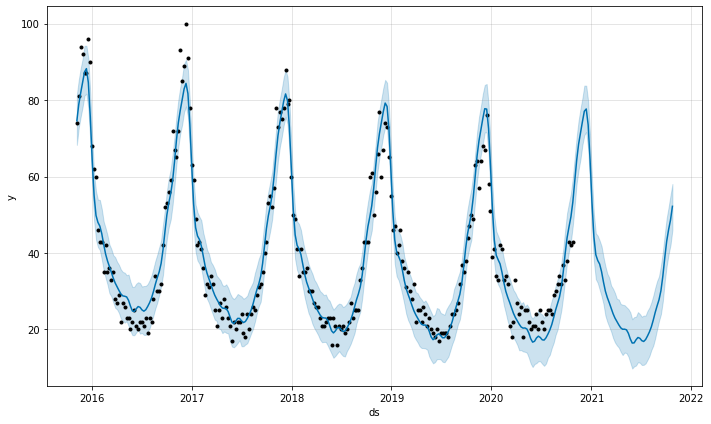

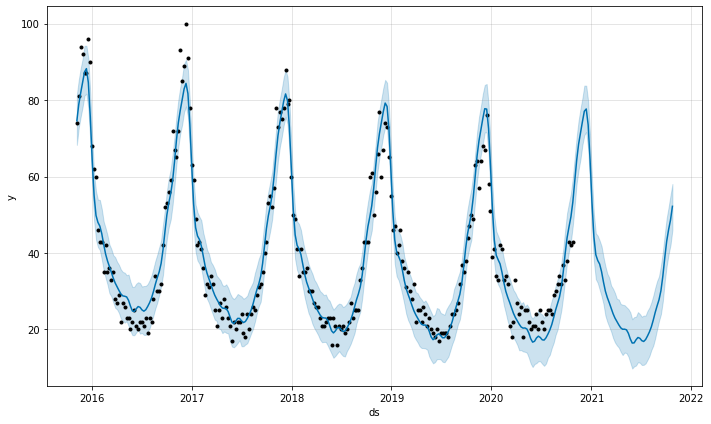

In [16]:
# Plot the Prophet predictions for Canada 
model_canada.plot(forecast_canada)

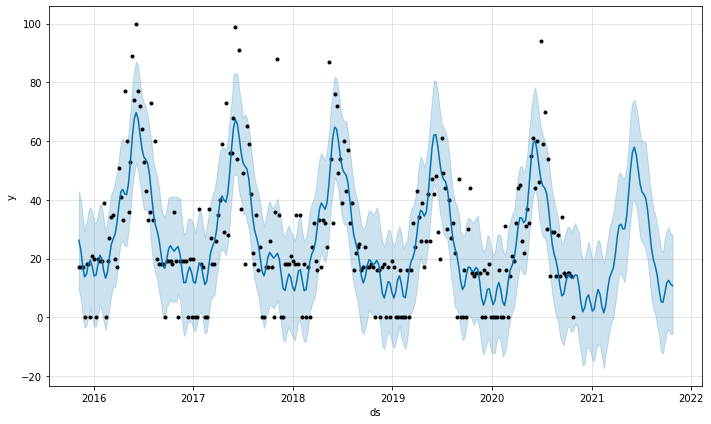

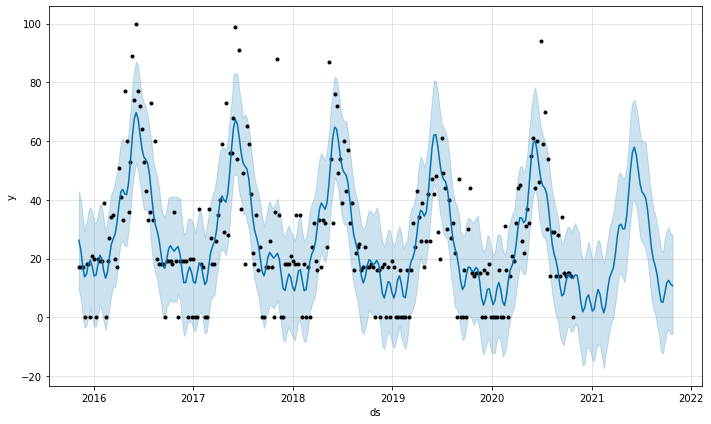

In [17]:
# Plot the Prophet predictions for Uruguay 
model_uruguay.plot(forecast_uruguay)

## Step 4: Analyze the forecast results by using Panda's `plot` function to plot the forecast DataFrame's “yhat”, “yhat_lower”, and “yhat_upper” columns for the Canadian and Uruguay models. Set the “ds” column as the DataFrame index before creating these plots.

In [18]:
# Set the index in the forecast_canada DataFrame to the ds datetime column 
forecast_canada = forecast_canada.set_index('ds')

# Display the forecast_canada DataFrame
forecast_canada.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2015-11-08,46.046115,68.282558,81.395917,46.046115,46.046115,28.544840,28.544840,28.544840,28.544840,28.544840,28.544840,0.0,0.0,0.0,74.590955
2015-11-15,45.949933,72.828071,85.314991,45.949933,45.949933,32.937274,32.937274,32.937274,32.937274,32.937274,32.937274,0.0,0.0,0.0,78.887207
2015-11-22,45.853751,75.639770,88.299846,45.853751,45.853751,36.023778,36.023778,36.023778,36.023778,36.023778,36.023778,0.0,0.0,0.0,81.877529
2015-11-29,45.757569,78.181450,90.777670,45.757569,45.757569,38.865473,38.865473,38.865473,38.865473,38.865473,38.865473,0.0,0.0,0.0,84.623042
2015-12-06,45.661387,81.193318,94.210271,45.661387,45.661387,41.701658,41.701658,41.701658,41.701658,41.701658,41.701658,0.0,0.0,0.0,87.363045


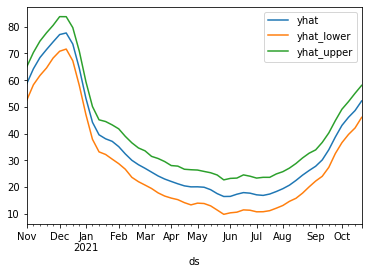

In [19]:
# Plot predictions for our forecast_canada DataFrame for the 52 week period 
forecast_canada[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-52:,:].plot()

In [20]:
# Set the index in the forecast_uruguay DataFrame to the ds datetime column 
forecast_uruguay = forecast_uruguay.set_index('ds')

# Display the forecast_uruguay DataFrame
forecast_uruguay.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2015-11-08,33.346622,9.111266,42.872098,33.346622,33.346622,-7.082872,-7.082872,-7.082872,-7.082872,-7.082872,-7.082872,0.0,0.0,0.0,26.263750
2015-11-15,33.301449,6.459708,40.016070,33.301449,33.301449,-10.347964,-10.347964,-10.347964,-10.347964,-10.347964,-10.347964,0.0,0.0,0.0,22.953485
2015-11-22,33.256275,-0.180840,34.301937,33.256275,33.256275,-15.895374,-15.895374,-15.895374,-15.895374,-15.895374,-15.895374,0.0,0.0,0.0,17.360902
2015-11-29,33.211102,-3.610500,29.255443,33.211102,33.211102,-19.477136,-19.477136,-19.477136,-19.477136,-19.477136,-19.477136,0.0,0.0,0.0,13.733966
2015-12-06,33.165929,-2.695217,32.177099,33.165929,33.165929,-18.472727,-18.472727,-18.472727,-18.472727,-18.472727,-18.472727,0.0,0.0,0.0,14.693202


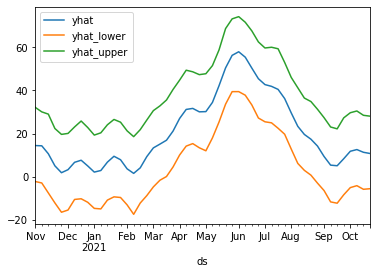

In [21]:
# Plot predictions for our forecast_uruguay DataFrame for the 52 week period 
forecast_uruguay[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-52:,:].plot()

## Step 5: Use the `plot_component` function from the Prophet models to analyze the patterns of the Google Trends times series data for the Canada and Uruguay models. Be sure to reset the index by converting “ds” back to a column before creating these plots.

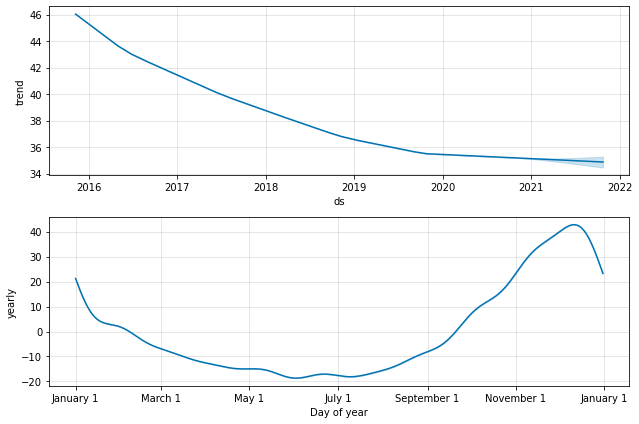

In [22]:
# Reset the index in the forecast_canada DataFrame
forecast_canada = forecast_canada.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame
fig_canada = model_canada.plot_components(forecast_canada)

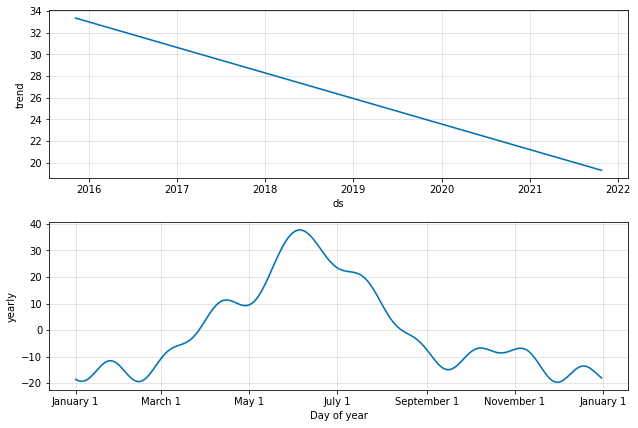

In [23]:
# Reset the index in the forecast_uruguay DataFrame
forecast_uruguay = forecast_uruguay.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_uruguay DataFrame
fig_uruguay = model_uruguay.plot_components(forecast_uruguay)